Universidad Galileo

Statistical Learning II

PAPD - Sección V

Sergio José Barrios Martínez

Carnet No. 19012765

# XOR y Redes Neuronales

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Parte No. 1

Dado el siguiente diagrama y asumiendo que las neuronas de salida  tienen errores de : [3.0,10.0], calcule el término de error(delta minúscula) simplificado  para cada una de las neuronas en el diagrama.


<img src="./imagenes/ANN.png">

Se definen las matrices de parámetros y vector de errores de salida:

In [2]:
parametros_capa3 = np.array([[0.23,0.22,0.77],[0.9,0.88,-0.4]])
parametros_capa2 = np.array([[-0.3,0.62,0.45],[0.45,0.57,0.48],[0.65,0.58,-0.45]])
parametros_capa1 = np.array([[0.3,0.46,0.02],[0.22,-0.7,0.65],[0.65,0.9,0.34]])

In [3]:
error_capa4 = [[3.0,10.0]]

In [4]:
error_capa3 = np.dot(error_capa4,parametros_capa3)
print("Error Capa 3:",error_capa3,"con dimensiones",np.shape(error_capa3))

Error Capa 3: [[ 9.69  9.46 -1.69]] con dimensiones (1, 3)


In [5]:
error_capa2 = np.dot(error_capa3,parametros_capa2)
print("Error Capa 2:",error_capa2,"con dimensiones",np.shape(error_capa2))

Error Capa 2: [[ 0.2515 10.4198  9.6618]] con dimensiones (1, 3)


In [6]:
error_capa1 = np.dot(error_capa2,parametros_capa1)
print("Error Capa 1:",error_capa1,"con dimensiones",np.shape(error_capa1))

Error Capa 1: [[ 8.647976  1.51745  10.062912]] con dimensiones (1, 3)


<img src="./imagenes/ANN1.png">

## Parte No. 2
### Back-propagation(Práctica)
Entrenar un aproximador para la función Xor usando 2 capas intermedias.
- Usar 2 neuronas en la capa anterior a la salida(segunda capa oculta)
- Usar al menos 2(pueden ser más) en la  primera capa oculta.
- Usar activación ReLu en las capas intermedias y  no activación en la salida
- Usar numpy
-Realizar 5 experimentos, en cada experimento(corrida de entrenamiento):
-Inicializar los parámetros aleatoriamente con distribución normal centrada en 0 y std = 0.1
-Retornar la representación intermedia de la segunda capa oculta.
-Graficar las 5 representaciones intermedias(1 por experimento), comparar, comentar y/o concluir.

Se define explícitamente la función de activación ReLu y la función que calcula su derivada:

In [7]:
def ReLu (x):   
    return x * (x > 0)

In [8]:
def derivada_ReLu(x):
    
    x[x<=0.0] = 0.0
    x[x>0.0] = 1.0
    
    return x

## Inicialización de Capas Intermedias
Se utilizará una Red Neuronal con 2 capas ocultas donde:
- La primera capa oculta tendrá 5 Neuronas
- La segunda capa oculta tendrá 2 Neuronas



In [9]:
def XOR_NN(lr,epochs):
    
    entradas = np.array([[0,0],[0,1],[1,0],[1,1]])
    salida_real = np.array([[0],[1],[1],[0]])
    
    # Para cada llamada, se inicializan aleatoriamente los parámetros de la red
    parametros_capa1 = np.random.normal(0,0.2,size=(2,5))
    interceptos_capa1 = np.random.normal(0,0.1,size=(1,5))
    parametros_capa2 = np.random.normal(0,0.2,size=(5,2))
    interceptos_capa2 = np.random.normal(0,0.1,size=(1,2))
    parametros_salida = np.random.normal(0,0.2,size=(2,1))
    intercepto_salida = np.random.normal(0,0.1,size=(1,1))
    
    print("----------------------------------------")
    print("Condiciones Iniciales Pre-Entrenamiento")
    print("----------------------------------------")
    print("Pesos Capa 1:",*parametros_capa1)
    print("Interceptos Capa 1:",*interceptos_capa1)
    print("Pesos Capa 2:",*parametros_capa2)
    print("Interceptos Capa 2:",*interceptos_capa2)
    print("----------------------------------------")
    
    
    for i in range(epochs):
        
        # Propagación Capa 1
        activacion_capa1 = np.dot(entradas,parametros_capa1)
        activacion_capa1 += interceptos_capa1
        salida_capa1 = ReLu(activacion_capa1)
    
        # Propagación Capa 2
        activacion_capa2 = np.dot(salida_capa1,parametros_capa2)
        activacion_capa2 += interceptos_capa2
        salida_capa2 = ReLu(activacion_capa2)
    
        # Propagación Capa Salida
        activacion_capa_salida = np.dot(salida_capa2,parametros_salida)
        activacion_capa_salida += intercepto_salida
        salida_estimada = activacion_capa_salida * 1 # No se usa activación en la salida, por lo que la derivada es 1
    
        #------------------------------------------------------------------------------------
    
        #Backpropagation
    
        #Backpropagation Capa de Salida
        error_capa_salida = salida_real - salida_estimada
    
        #Backpropagation Capa 2
        error_capa2 = np.dot(error_capa_salida,parametros_salida.T) * derivada_ReLu(salida_capa2)
    
        #Backpropagation Capa 1
        error_capa1 = np.dot(error_capa2,parametros_capa2.T) * derivada_ReLu(salida_capa1)
        
        #------------------------------------------------------------------------------------       
    
        # Actualización de Parámetros Capa Salida
        parametros_salida += salida_capa2.T.dot(error_capa_salida) * lr
        intercepto_salida += np.sum(error_capa_salida,axis=0,keepdims=True) * lr
    
        # Actualización de Parámetros Capa 1
        parametros_capa2 += salida_capa1.T.dot(error_capa2) * lr
        interceptos_capa2 += np.sum(error_capa2,axis=0,keepdims=True) * lr
        
        # Actualización de Parámetros Capa 2
        parametros_capa1 += entradas.T.dot(error_capa1) * lr
        interceptos_capa1 += np.sum(error_capa1,axis=0,keepdims=True) * lr

    
    print("Representación Intermedia Capa 2:")
    print("----------------------------------------")
    print(salida_capa2)
    print("----------------------------------------")   
    x = salida_capa2[:,0]
    y = salida_capa2[:,1]

    plt.plot(x, y, 'o', color='red');
    plt.show()
        
        
    print("Condiciones Finales Post-Entrenamiento")
    print("----------------------------------------")
    print("Pesos Capa 1:",*parametros_capa1)
    print("Interceptos Capa 1:",*interceptos_capa1)
    print("Pesos Capa 2:",*parametros_capa2)
    print("Interceptos Capa 2:",*interceptos_capa2)
    print("----------------------------------------")
   
    print("Predicción con",epochs,"epochs:",*salida_estimada)


### Experimento No. 1

----------------------------------------
Condiciones Iniciales Pre-Entrenamiento
----------------------------------------
Pesos Capa 1: [ 0.17240024 -0.27348423 -0.46334321  0.05279985 -0.13081335] [ 0.13605116  0.2258269   0.14086426 -0.02000488 -0.11768008]
Interceptos Capa 1: [-0.03644351  0.01713301 -0.04837629 -0.01526384 -0.15679934]
Pesos Capa 2: [-0.24423514 -0.03193022] [-0.22426765  0.10756958] [-0.37924478 -0.1988193 ] [ 5.50550259e-05 -2.49809343e-01] [-0.4059371   0.26284864]
Interceptos Capa 2: [0.05713009 0.05491586]
----------------------------------------
Representación Intermedia Capa 2:
----------------------------------------
[[1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 1.]]
----------------------------------------


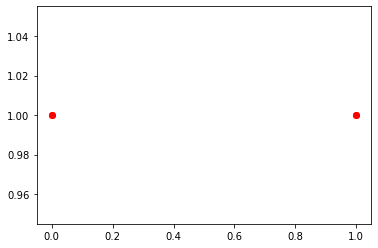

Condiciones Finales Post-Entrenamiento
----------------------------------------
Pesos Capa 1: [ 1.07252088 -0.71701138 -1.52722072  1.26763839 -0.13081335] [ 0.11247169 -1.28019766  1.52722072  0.65985256 -0.11768008]
Interceptos Capa 1: [ 2.31862934e-06  1.99720904e+00 -1.11274037e-15  1.77666216e-17
 -1.56799339e-01]
Pesos Capa 2: [-0.52180255 -0.2568802 ] [0.78563147 1.88890851] [-0.25438153  0.58415989] [-0.54295027  0.12331871] [-0.4059371   0.26284864]
Interceptos Capa 2: [0.24214639 0.06670603]
----------------------------------------
Predicción con 10000 epochs: [3.92012705e-17] [1.] [1.] [7.82469762e-16]


In [12]:
XOR_NN(0.1,10000)

### Experimento No. 2

----------------------------------------
Condiciones Iniciales Pre-Entrenamiento
----------------------------------------
Pesos Capa 1: [-0.00410797 -0.22873541  0.24279965 -0.38191318  0.15383877] [ 0.01309845  0.05857634 -0.20538526 -0.0324073   0.44430271]
Interceptos Capa 1: [ 0.04992249  0.07797436  0.03885038  0.12370033 -0.07068688]
Pesos Capa 2: [-0.01938749  0.31781475] [-0.22842887 -0.57745488] [0.04125595 0.03105449] [0.20261364 0.23643003] [-0.07423711  0.05523602]
Interceptos Capa 2: [0.22528917 0.13607828]
----------------------------------------
Representación Intermedia Capa 2:
----------------------------------------
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
----------------------------------------


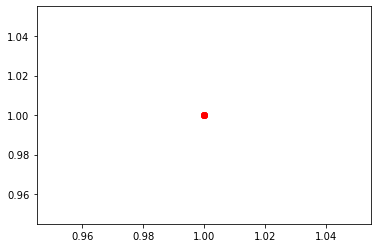

Condiciones Finales Post-Entrenamiento
----------------------------------------
Pesos Capa 1: [ 1.37029228 -1.41294133  0.57935393 -1.30219861 -0.84357352] [-1.42640818 -1.41294133  0.39245239  1.20976244 -0.67173405]
Interceptos Capa 1: [5.61158935e-02 1.41294133e+00 5.12033456e-18 9.24361740e-02
 1.51530757e+00]
Pesos Capa 2: [0.03543101 0.53809288] [-0.59454197 -1.66826379] [0.09263845 0.43824113] [0.24858753 0.34700014] [0.50345992 1.81883643]
Interceptos Capa 2: [ 0.05218957 -0.04564458]
----------------------------------------
Predicción con 10000 epochs: [3.33066907e-16] [1.] [1.] [8.04911693e-16]


In [16]:
XOR_NN(0.1,10000)

### Experimento No. 3

----------------------------------------
Condiciones Iniciales Pre-Entrenamiento
----------------------------------------
Pesos Capa 1: [ 0.05949723 -0.1772689   0.31910539  0.05124898 -0.22650183] [ 0.14564288 -0.01787536 -0.18656661 -0.50925731 -0.40174354]
Interceptos Capa 1: [-0.14212719  0.00829276 -0.02145681 -0.02231253  0.02081752]
Pesos Capa 2: [ 0.11859174 -0.2900038 ] [ 0.0367465  -0.08873487] [0.09690916 0.20091619] [ 0.14250441 -0.29734174] [0.17629356 0.21327441]
Interceptos Capa 2: [0.10974109 0.16628973]
----------------------------------------
Representación Intermedia Capa 2:
----------------------------------------
[[1. 0.]
 [1. 1.]
 [1. 0.]
 [1. 0.]]
----------------------------------------


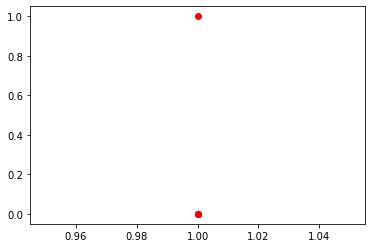

Condiciones Finales Post-Entrenamiento
----------------------------------------
Pesos Capa 1: [ 2.56459141 -0.61459708  1.04989705  0.8856149  -0.22650183] [ 0.30817677 -0.62276764 -1.33498898 -0.71430674 -0.40174354]
Interceptos Capa 1: [-0.22714004  0.61459708  0.28509193  0.30867962 -0.00068629]
Pesos Capa 2: [-0.12065771 -0.07957956] [-0.94259343 -0.63412542] [ 0.86387213 -0.13184885] [-0.08065442 -0.92606348] [0.07312069 0.17360387]
Interceptos Capa 2: [0.4444926  0.65503708]
----------------------------------------
Predicción con 10000 epochs: [-4.16333634e-17] [1.] [1.] [1.17961196e-15]


In [17]:
XOR_NN(0.1,10000)

### Experimento No. 4

----------------------------------------
Condiciones Iniciales Pre-Entrenamiento
----------------------------------------
Pesos Capa 1: [-0.28543363  0.21369322  0.00054766  0.1689021  -0.20710121] [ 0.42929393 -0.38541897 -0.10826425 -0.12465166 -0.14328016]
Interceptos Capa 1: [ 0.1615116  -0.04738169 -0.03057832 -0.0120986  -0.01687151]
Pesos Capa 2: [ 0.08087827 -0.0448391 ] [-0.39161267  0.03760652] [0.12650256 0.03680961] [-0.11940948 -0.40123281] [-0.17437694  0.18036941]
Interceptos Capa 2: [0.09076635 0.09449023]
----------------------------------------
Representación Intermedia Capa 2:
----------------------------------------
[[0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]]
----------------------------------------


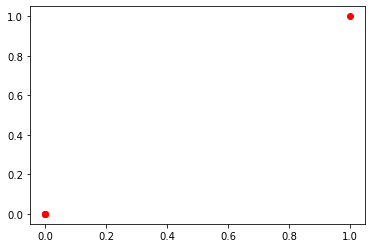

Condiciones Finales Post-Entrenamiento
----------------------------------------
Pesos Capa 1: [-4.58207688e-01  5.93956402e-01  5.47656279e-04  2.68598119e-01
 -2.07101205e-01] [ 0.59937034 -0.50601314 -0.10826425 -0.15509414 -0.14328016]
Interceptos Capa 1: [ 0.45528354  0.0765012  -0.03057832  0.01769749 -0.01687151]
Pesos Capa 2: [-0.72234806 -0.34723254] [0.57769824 0.32821908] [0.12650256 0.03680961] [ 0.49520499 -0.13820031] [-0.17437694  0.18036941]
Interceptos Capa 2: [0.26609714 0.13069464]
----------------------------------------
Predicción con 10000 epochs: [0.33333333] [0.33333333] [1.] [0.33333333]


In [18]:
XOR_NN(0.1,10000)

### Experimento No. 5

----------------------------------------
Condiciones Iniciales Pre-Entrenamiento
----------------------------------------
Pesos Capa 1: [ 0.10855549  0.0499606   0.12247576 -0.16011035  0.11371199] [ 0.0308025  -0.19360066 -0.04510924 -0.2299234   0.10154076]
Interceptos Capa 1: [-0.12156287  0.08062109 -0.02283556 -0.08061447 -0.00091174]
Pesos Capa 2: [0.00361089 0.07650076] [ 0.11134728 -0.03945667] [-0.00465979 -0.42888464] [-0.0660437   0.10898418] [0.10826332 0.30428366]
Interceptos Capa 2: [ 0.199075   -0.11338318]
----------------------------------------
Representación Intermedia Capa 2:
----------------------------------------
[[1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]]
----------------------------------------


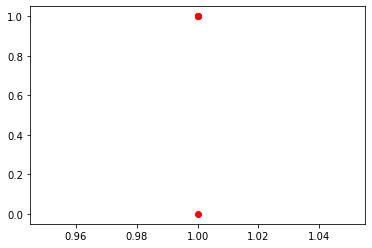

Condiciones Finales Post-Entrenamiento
----------------------------------------
Pesos Capa 1: [ 0.89825052 -0.6739508   1.54296955 -0.16011035 -1.48900404] [ 0.97548864 -0.6739508  -1.91068782 -0.2299234   0.97371307]
Interceptos Capa 1: [-0.87442676  0.6739508   0.36771826 -0.08061447  0.51529097]
Pesos Capa 2: [-0.01858746  0.10899701] [-1.12326888 -0.06143543] [ 0.85526363 -0.6015335 ] [-0.0660437   0.10898418] [0.82275307 0.72099337]
Interceptos Capa 2: [ 0.3206854  -0.10892207]
----------------------------------------
Predicción con 10000 epochs: [2.48955856e-11] [1.] [1.] [1.96544087e-10]


In [19]:
XOR_NN(0.1,10000)

### Conclusiones:
- Se pudo observar que la red neuronal no siempre produce el mismo modelo en cada experimento, lo cual es evidente por los pesos encontrados para cada intento. Estos pesos son distintos. Se hizo el experimento de probar con la misma inicialización de parámetros y el modelo encontrado siempre fue el mismo, por lo que se concluye que el valor final de los parámetros de la red neuronal depende en gran medida del valor inicial de los parámetros antes del entrenamiento.
- Se logró convergencia a un valor aceptable en 4 de los experimentos, sin embargo en uno de ellos pareció no haber clasificado bien una de las combinaciones. Podría deberse a la existencia de alguna región plana de convergencia o que se necesitaban mayores iteraciones para minimizar el costo.
- Las representaciones intermedias de la segunda capa oculta se observa una reducción de dimensionalidad a un espacio donde son separables por una linea los valores (consistente con las representaciones intermedias que se vieron en la práctica anterior con el perceptrón para XOR).